## 정보보호와 시스템보안
### Team Project #1

### 팀 정보
- 팀 이름 : 10
- 팀 번호 : 10
- 팀원 목록 : 이한정 (20191650), 김지홍 (20191572)

---

### 프로젝트 TODO
1. Data Preprocessing
2. Data Scaling
3. IP Voting

### 프로젝트 데이터 셋
- 국민대학교 네트워크 플로우 데이터셋(5시간)   

### 참고자료
- 네트워크 플로우([Network Flow](https://checkmk.com/guides/network-flow-monitoring)):   
한번의 세션에서 출발지(Source IP)와 도착지(Destination IP) 사이에 오가는 패킷에 대한 통계적 데이터
### 주의사항
- 기존에 있는 파일과 폴더의 구조를 변경할 수 없음

### 제출
- `<팀 번호>_Project1.ipynb`파일을 팀장이 제출   
팀 번호 : 구글 스프레드 시트 행 인덱스

In [1]:
from google.colab import drive

drive_path = '/content/drive'
drive.mount(drive_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!7z x /content/drive/MyDrive/2022_security_project1.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/                                 1 file, 178076816 bytes (170 MiB)

Extracting archive: /content/drive/MyDrive/2022_security_project1.zip
--
Path = /content/drive/MyDrive/2022_security_project1.zip
Type = zip
Physical Size = 178076816

  0%    
Would you like to replace the existing file:
  Path:     ./Security Project1/BCE_model.py
  Size:     2858 bytes (3 KiB)
  Modified: 2022-11-02 01:57:33
with the file from archive:
  Path:     Security Project1/BCE_model.py
  Size:     2858 bytes (3 KiB)
  Modified: 2022-11-02 01:57:33
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? q

Archives with Errors: 1



Break signaled


암호: @kookminsecurityproject2022#

In [3]:
%cd "./Security Project1"

/content/Security Project1


In [4]:
from Utils import open_pickle
import pandas as pd
import numpy as np

### train, valid 데이터 셋 불러오기
- 가상대학을 통해 다운받은 플로우 데이터를 불러온다.

In [5]:
train_path = r"./train.csv"
valid_path = r"./valid.csv"

train_df = pd.read_csv(train_path)
valid_df = pd.read_csv(valid_path)

In [6]:
# 학습, 검증 플로우 데이터 개수 확인
print(len(train_df), len(valid_df))

977270 325560


In [7]:
# 주어진 플로우 컬럼 종류 확인
train_df.keys()

Index(['Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Flags',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Std', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Std',
       'Packet Length Variance', 'Average Packet Size', 'Fwd Segment Size Avg',
       'Bwd Segment Size Avg', 'FWD Init Win Bytes', 'Bwd Init Win Bytes',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'Active Max'

In [8]:
# 데이터 확인
train_df.head(5)

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flags,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,110.15.155.169,13850,97.2.159.1,53,TCP,......S.,03:52:00,3119967,3,0,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign_IP
1,110.15.155.169,43842,97.2.159.1,53,TCP,......S.,03:37:20,2991830,3,0,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign_IP
2,110.15.155.171,25918,97.2.159.1,53,TCP,......S.,03:10:28,3004658,3,0,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign_IP
3,238.61.97.110,4445,97.2.159.1,53,TCP,...A...F,00:42:24,4402645,2,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign_IP
4,110.15.155.171,28467,97.2.159.1,53,TCP,......S.,02:45:28,3001784,3,0,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign_IP


## Problem #1 : Data Preprocessing

### 조건
- "Label"컬럼을 사용하여, 악성 IP의 플로우는 1, 정상 IP의 플로우는 0으로 구성된 라벨 리스트 생성   
=> `train_y`, `valid_y`(변수명 유지)
- 예외처리 컬럼 "Src IP", "Src Port", "Dst IP", "Dst Port", "Protocol", "Timestamp", "Flags", "Label"을 제외,   
8개 컬럼을 제외한 48컬럼을 사용하여 데이터셋 생성   
- 4개의 `list` 모두 csv 파일의 플로우 순서 유지
- hint : 결과 파일을 분석하여 코드를 구상한다.

### 관련 정보
- [pandas](https://pandas.pydata.org/docs/) library, [csv](https://docs.python.org/ko/3/library/csv.html) module
- 플로우 피처 정보(주어진 ppt 특정 부분으로 명시)

### I/O
- input :
    > - `train.csv`
    > - `valid.csv`
- output :   
    > - `train_y` -> `list`
    > - `valid_y` -> `list`
    > - `train_list` -> `list`
    > - `valid_list` -> `list`

In [9]:
#TODO1

from tqdm import tqdm

train_y = []
valid_y = []

for row in tqdm(train_df.itertuples()):
  if row.Label == 'Benign_IP':
    train_y.append(0)
  else:
    train_y.append(1)
  
for row in tqdm(valid_df.itertuples()):
  if row.Label == 'Benign_IP':
    valid_y.append(0)
  else:
    valid_y.append(1)


exception_cols = ["Src IP", "Dst IP", "Protocol", "Timestamp", "Flags", "Label"]

dropped_train_df = train_df.drop(exception_cols, axis=1)
dropped_valid_df = valid_df.drop(exception_cols, axis=1)

train_list = dropped_train_df.values.tolist()
valid_list = dropped_valid_df.values.tolist()

977270it [00:06, 156403.77it/s]
325560it [00:02, 153404.51it/s]


In [10]:
# Problem 2~를 실행 후에는 Solved가 print되지 않을 수 있음(같은 변수명 공유)
if "answer_train_list" not in locals():
    answer_train_list = open_pickle("./problem1_answer/answer_train_list.pkl")
if "answer_valid_list" not in locals():
    answer_valid_list = open_pickle("./problem1_answer/answer_valid_list.pkl")
if "answer_train_y" not in locals():
    answer_train_y = open_pickle("./problem1_answer/answer_train_y.pkl")
if "answer_valid_y" not in locals():
    answer_valid_y = open_pickle("./problem1_answer/answer_valid_y.pkl")

if  answer_train_list == train_list and\
    answer_valid_list == valid_list and\
    answer_train_y == train_y and\
    answer_valid_y == valid_y :
    print("Problem #1 Solved")

Problem #1 Solved


## Problem #2 : Data Scaling

### 조건
- sklearn의 [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)사용
- scaler는 학습 데이터로만 완성해야한다.

### 관련 정보
[numpy](https://numpy.org/devdocs/) 패키지

## I/O
- input :
    > - `train_list`
    > - `valid_list`
- output :   
    > - `train_X` -> `ndarray(float64)`
    > - `valid_X` -> `ndarray(float64)`

In [11]:
from sklearn.preprocessing import StandardScaler 

#TODO2 - StandardScaler
scaler = StandardScaler()
scaler.fit(train_list)
train_X = scaler.transform(train_list)
valid_X = scaler.transform(valid_list)

In [12]:
if "answer_train_X" not in locals():
    answer_train_X = open_pickle("./problem2_answer/answer_train_X.pkl")
if "answer_valid_X" not in locals():
    answer_valid_X = open_pickle("./problem2_answer/answer_valid_X.pkl")

if  np.array_equal(answer_train_X, train_X) and\
    np.array_equal(answer_valid_X, valid_X):
    print("Problem #2 Solved")

In [13]:
#학습을 위한 데이터 타입 변환
from BCE_model import train, test

train_X = train_X.astype(np.float32)
valid_X = valid_X.astype(np.float32)
train_y = np.array(train_y, dtype=np.float32)
valid_y = np.array(valid_y, dtype=np.float32)

In [59]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(train_X, train_y)
print(lr.score(valid_X, valid_y))

0.8106831306057255


In [16]:
from sklearn.linear_model import Perceptron

per = Perceptron(max_iter=100000, eta0=0.1, random_state=1)
per.fit(train_X, train_y)
print(per.score(valid_X, valid_y))

0.6373295245116107


In [101]:
# train 데이터 학습 및 valid 데이터 예측
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(train_X, train_y)
predict = model.predict(valid_X)
model.score(valid_X, valid_y)

0.990484088954417

In [102]:
predict = np.array(predict, dtype="float32")

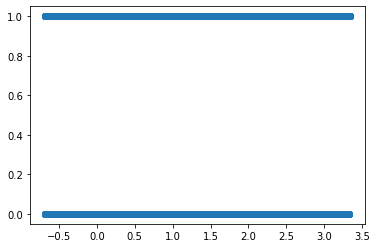

In [103]:
# Predict 데이터 분포 그래프
import matplotlib.pylab as plt

valid_X_shaped = valid_X[:,1]

plt.scatter(valid_X_shaped, predict)


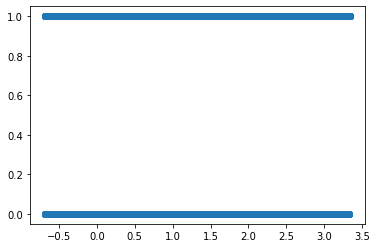

In [104]:
plt.scatter(valid_X_shaped, valid_y)

In [105]:
# 성능 평가를 위해 예측 값을 반올림
round_valid_y = valid_y.astype("int")
round_predict = np.round(predict)

성능 평가 지표 관련 자료 : https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/   
*주의사항 : 이후 진행할 Problem #3의 채점을 위해 학습 결과가 보기 예시와 동일하게 나오는지 확인

In [106]:
# 플로우 기준 이상 탐지 성능 평가
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("confusion_matrix\n", confusion_matrix(round_valid_y, round_predict))
print(f"accuracy\t: {accuracy_score(round_valid_y, round_predict): .5f}")
print(f"precision\t: {precision_score(round_valid_y, round_predict): .5f}")
print(f"recall\t\t: {recall_score(round_valid_y, round_predict): .5f}")
print(f"F-1\t\t: {f1_score(round_valid_y, round_predict): .5f}")

confusion_matrix
 [[188817   1456]
 [  1642 133645]]
accuracy	:  0.99048
precision	:  0.98922
recall		:  0.98786
F-1		:  0.98854


In [94]:
# 정상 외부 IP set
outer_benignIP_set = open_pickle("./outer_benign_IP.pkl")
# 악성 외부 IP set
outer_malIP_set = open_pickle("./outer_mal_IP.pkl")

In [107]:
#외부 IP의 악성, 정상 개수 확인
len(outer_benignIP_set), len(outer_malIP_set)

(590, 457)

In [108]:
# Problem #3을 위해 dictionary형태로 변경
labelIP_dict = dict()

for ip in outer_benignIP_set:
    labelIP_dict[ip] = 0
for ip in outer_malIP_set:
    labelIP_dict[ip] = 1


## Problem #3 : IP Voting
### 조건
- 모든 flow는 내부IP <-> 외부IP 통신으로 이루어져있다.
- 외부IP는 악성IP, 정상IP로 나뉜다.
- 각 외부 IP별로 1개 이상의 플로우를 가진다.
- valid.csv의 각 외부IP별로 플로우를 분류한다.
- 각 외부 IP에서 속한 플로우가 1개라도 `theta`이상의 predict값을 가진다면 악성 외부 IP로 예측한다.
- 외부IP를 key, 예측 값을 value로 가지는 dictionary를 반환한다.(`answerIP_dict`과 같은 형태)
- 예측 라벨은 악성 외부 IP를 `1`, 정상 외부 IP를 `0`으로 한다. 
- 주어진 모든 `theta`에 대해 작동할 수 있도록 한다. (*채점시 다른 `theta`적용 후 결과 비교 예정)
- hint : csv파일의 순서와 predict의 순서는 일치한다.

### I/O
- input :
    > - `valid.csv`
    > - `predict`
    > - `answerIP_dict`
    > - `theta`
- output :   
    > - `predictIP_dict` -> `dict`

In [109]:
theta = 0.98 # example

#TODO3
external_IP = list(labelIP_dict.keys())
external_IP_group = dict()

valid_df = valid_df.rename(columns={'Src IP': 'src_ip'})
valid_df = valid_df.rename(columns={'Dst IP': 'dst_ip'})

for row in tqdm(valid_df.itertuples()):
  src_ip = row.src_ip
  dst_ip = row.dst_ip
  if src_ip in external_IP:
    if src_ip in external_IP_group:
      external_IP_group[src_ip].append(row)
    else:
      external_IP_group[src_ip] = [row]
  else:
    if dst_ip in external_IP_group:
      external_IP_group[dst_ip].append(row)
    else:
      external_IP_group[dst_ip] = [row]

predictIP_dict = dict()

for key, values in tqdm(external_IP_group.items()):
  predictIP_dict[key] = 0
  for value in values:
    if predict[value.Index] >= theta:
      predictIP_dict[key] = 1
      break


325560it [00:10, 31130.40it/s]
100%|██████████| 1047/1047 [00:00<00:00, 5777.72it/s]


In [110]:
if "answer_predictIP_dict" not in locals():
    answer_predictIP_dict = open_pickle("./problem3_answer/answer_predictIP_dict.pkl")

if  predictIP_dict == answer_predictIP_dict:
    print("Problem #3 Solved")

In [111]:
import pickle

with open("./answer_predictIP_dict_new.pkl", 'wb') as f:
    pickle.dump(predictIP_dict, f)

In [112]:
# 정답 IP dictionary와 예측 IP dictionary를 비교하여 성능 평가
pred_IP = []
label_IP = []

for k in predictIP_dict.keys():
    pred_IP.append(predictIP_dict[k])
    label_IP.append(labelIP_dict[k])

print("confusion_matrix\n", confusion_matrix(label_IP, pred_IP))
print(f"accuracy\t: {accuracy_score(label_IP, pred_IP): .5f}")
print(f"precision\t: {precision_score(label_IP, pred_IP): .5f}")
print(f"recall\t\t: {recall_score(label_IP, pred_IP): .5f}")
print(f"F-1\t\t: {f1_score(label_IP, pred_IP): .5f}")

confusion_matrix
 [[493  97]
 [  0 457]]
accuracy	:  0.90735
precision	:  0.82491
recall		:  1.00000
F-1		:  0.90406


### Test 데이터 예측, CSV 파일 생성


In [29]:
import csv


# path = "./<10>_Project2.csv"

# with open(path, 'w', newline='') as f:
#   w = csv.writer(f)
#   w.write(['IP', 'Prediction'])
#   for i in predict_test:
#     w.writerow(i)
#   f.close()